# Getting Started

## Making an environment

Here is a quick example of how to create an environment:

/home/avlis/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/avlis/anaconda3/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.action_type to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.action_type` for environment variables or `env.get_wrapper_attr('action_type')` that will search the reminding wrappers.
  logger.warn(
/home/avlis/anaconda3/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.action_type to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.action_type` for environment variables or `env.get_wrapper_attr('action_type')` that will search the reminding wrappers.
  logger.warn

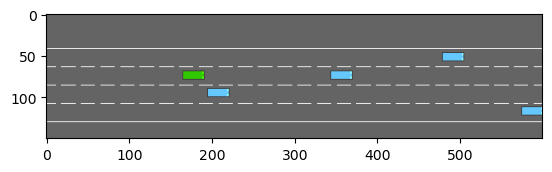

In [1]:
import gymnasium as gym
from matplotlib import pyplot as plt
%matplotlib inline

env = gym.make('highway-v0', render_mode='rgb_array')
env.reset()
for _ in range(3):
    action = env.action_type.actions_indexes["IDLE"]
    obs, reward, done, truncated, info = env.step(action)
    env.render()

plt.imshow(env.render())
plt.show()
env.close()

## Configuring an environment

The observations, actions, dynamics and rewards of an environment are parametrized by a configuration, defined as a config dictionary. After environment creation, the configuration can be accessed using the config attribute.

In [2]:
import pprint

env = gym.make("highway-v0", render_mode='rgb_array')
pprint.pprint(env.config)

{'action': {'type': 'DiscreteMetaAction'},
 'centering_position': [0.3, 0.5],
 'collision_reward': -1,
 'controlled_vehicles': 1,
 'duration': 40,
 'ego_spacing': 2,
 'high_speed_reward': 0.4,
 'initial_lane_id': None,
 'lane_change_reward': 0,
 'lanes_count': 4,
 'manual_control': False,
 'normalize_reward': True,
 'observation': {'type': 'Kinematics'},
 'offroad_terminal': False,
 'offscreen_rendering': False,
 'other_vehicles_type': 'highway_env.vehicle.behavior.IDMVehicle',
 'policy_frequency': 1,
 'real_time_rendering': False,
 'render_agent': True,
 'reward_speed_range': [20, 30],
 'right_lane_reward': 0.1,
 'scaling': 5.5,
 'screen_height': 150,
 'screen_width': 600,
 'show_trajectories': False,
 'simulation_frequency': 15,
 'vehicles_count': 50,
 'vehicles_density': 1}


/home/avlis/anaconda3/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.config to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.config` for environment variables or `env.get_wrapper_attr('config')` that will search the reminding wrappers.
  logger.warn(


For example, the number of lanes can be changed with:

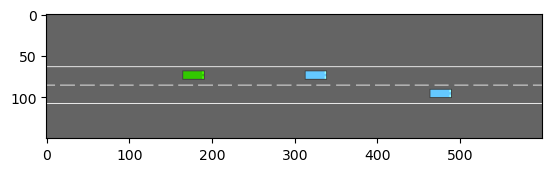

In [3]:
env.config["lanes_count"] = 2
env.reset()

plt.imshow(env.render())
plt.show()

env.close()

## Training an agent

Reinforcement Learning agents can be trained using libraries such as eleurent/rl-agents, openai/baselines or Stable Baselines3.

Here is an example of SB3’s DQN implementation trained on highway-fast-v0 with its default kinematics observation and an MLP model.

In [5]:
import gymnasium as gym
import highway_env
from stable_baselines3 import DQN

env = gym.make("highway-fast-v0")
model = DQN('MlpPolicy', env,
              policy_kwargs=dict(net_arch=[256, 256]),
              learning_rate=5e-4,
              buffer_size=15000,
              learning_starts=200,
              batch_size=32,
              gamma=0.8,
              train_freq=1,
              gradient_steps=1,
              target_update_interval=50,
              verbose=1,
              tensorboard_log="highway_dqn/")
model.learn(int(2e4))
model.save("highway_dqn/model")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to highway_dqn/DQN_3
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14       |
|    ep_rew_mean      | 11.1     |
|    exploration_rate | 0.973    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 28       |
|    time_elapsed     | 1        |
|    total_timesteps  | 56       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 9.36     |
|    exploration_rate | 0.953    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 28       |
|    time_elapsed     | 3        |
|    total_timesteps  | 98       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
| 

/home/avlis/anaconda3/lib/python3.9/site-packages/highway_env/envs/common/abstract.py:276: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("highway-fast-v0", render_mode="rgb_array")
  gym.logger.warn(
/home/avlis/anaconda3/lib/python3.9/site-packages/highway_env/envs/common/abstract.py:276: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("highway-fast-v0", render_mode="rgb_array")
  gym.logger.warn(
/home/avlis/anaconda3/lib/python3.9/site-packages/highway_env/envs/common/abstract.py:276: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("highway-fast-v0", render_mode="rgb_array")
  gym.logger.warn(
/home/avlis/anaconda3/lib/python3.9/site-packages/highway_env/envs/common/abstract.py:27

In [12]:
# Load and test saved model
env = gym.make('highway-v0', render_mode='rgb_array')

model = DQN.load("highway_dqn/model")
for _ in range(3):
  done = truncated = False
  obs, info = env.reset()
  while not (done or truncated):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    env.render()
  env.close()

# Observations

## Grayscale Image

The GrayscaleObservation is a grayscale image of the scene, where are set with the observation_shape parameter. The RGB to grayscale conversion is a weighted sum, configured by the weights parameter. Several images can be stacked with the stack_size parameter, as is customary with image observations.

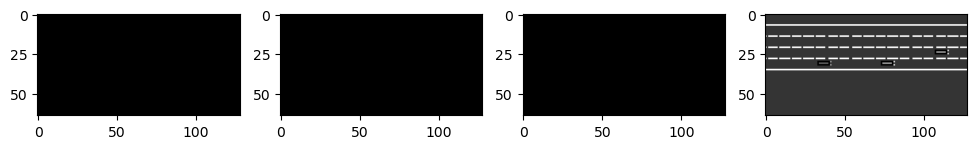

In [18]:
from matplotlib import pyplot as plt
%matplotlib inline

STACK_SIZE = 4

config = {
       "observation": {
           "type": "GrayscaleObservation",
           "observation_shape": (128, 64),
           "stack_size": STACK_SIZE,
           "weights": [0.2989, 0.5870, 0.1140],  # weights for RGB conversion
           "scaling": 1.75,
       },
       "policy_frequency": 2
   }
env.configure(config)
obs, info = env.reset()

fig, axes = plt.subplots(ncols=STACK_SIZE, figsize=(12, 5))

if STACK_SIZE > 1:
    for i, ax in enumerate(axes.flat):
        ax.imshow(obs[i, ...].T, cmap=plt.get_cmap('gray'))
else:
    axes.imshow(obs[0, ...].T, cmap=plt.get_cmap('gray'))
plt.show()

### Illustration of the stack mechanism

We illustrate the stack update by performing three steps in the environment.

/home/avlis/anaconda3/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.action_type to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.action_type` for environment variables or `env.get_wrapper_attr('action_type')` that will search the reminding wrappers.
  logger.warn(


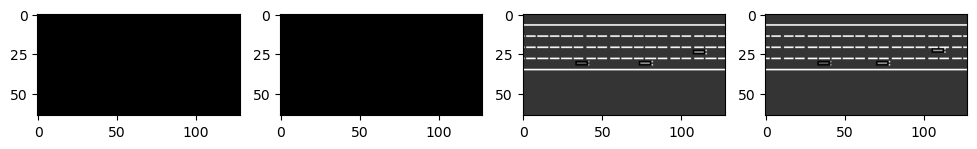

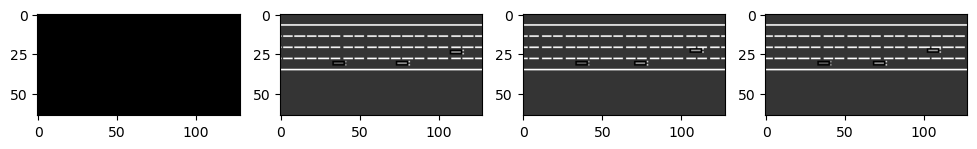

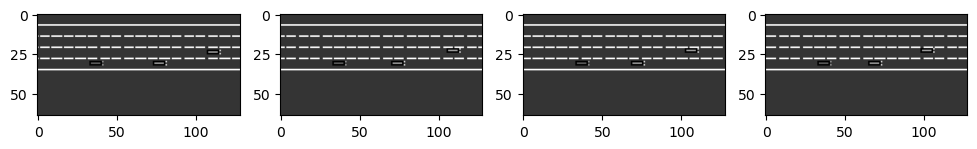

In [19]:
for _ in range(3):
    obs, reward, done, truncated, info = env.step(env.action_type.actions_indexes["IDLE"])

    fig, axes = plt.subplots(ncols=4, figsize=(12, 5))
    for i, ax in enumerate(axes.flat):
        ax.imshow(obs[i, ...].T, cmap=plt.get_cmap('gray'))
plt.show()